In [1]:
import numpy as np
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Numerically Integrating Newton's Second Law

There are many times in physics when you want to know the solution to a differential equation that you can't solve analytically. This comes up in fields from ranging from astrophysics to biophysics to particle physics. Once you change from finding exact solutions to numerical solutions, all sorts of nuaced difficulties can arise. We'll explore a few examples in this workbook.

## The Simple Harmonic Oscillator

Let's start with a system where we know the answer so that we'll have something concrete to compare against. For a simple harmonic oscillator we know that the acceleration comes from a spring force:
$$\ddot x=-\tfrac{k}{m}x.$$
We know that the solution to this differential equation is:
$$x(t) = A\sin{\sqrt{\tfrac{k}{m}}t}.$$

Let's work on integrating it numerically. The simplest way of integrating this equation is to use a "delta" approximation for the derivates.
$$\tfrac{\Delta v}{\Delta t}=-\tfrac{k}{m}x\implies\Delta v=-\tfrac{k}{m}x\Delta t = a\Delta t$$
$$\tfrac{\Delta x}{\Delta t}=v\implies\Delta x=v\Delta t$$

Combining these, we can work out that one way of integrating this equation to find $x(t)$ is:

Problem 2.1 on the worksheet.

$$v_{t+\Delta t}=v_{t}+a\Delta=v_{t}-\tfrac{k}{m}x\Delta t$$
$$x_{t+\Delta t}=x_{t}+v_{t}\Delta t.$$

Let's set this up!

In [11]:
# Input Values
time = 40.
delta_t = .1
time_steps = int(time/delta_t)
# Create arrays for storing variables
x = np.zeros(time_steps)
v = np.zeros(time_steps)
t = np.zeros(time_steps)
# Set initial values to "stretched"
x[0] = 1.
v[0] = 0.
t[0] = 0.
omega = .75
# Create function to calculate acceleration
def accel(x,omegaIn):
    return -omegaIn**2*x

In [12]:
# Solve the equation
for tt in xrange(time_steps-1):
    v[tt+1] = v[tt]+accel(x[tt],omega)*delta_t#
    x[tt+1] = x[tt]+v[tt]*delta_t
    t[tt+1] = t[tt]+delta_t
# Find exact answers
xExact = x[0]*np.cos(omega*t)
vExact = -x[0]*omega*np.sin(omega*t)

## Plots

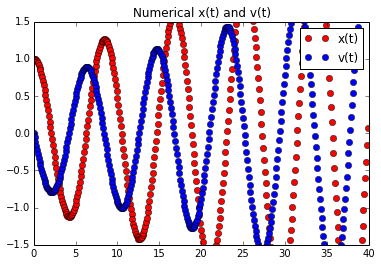

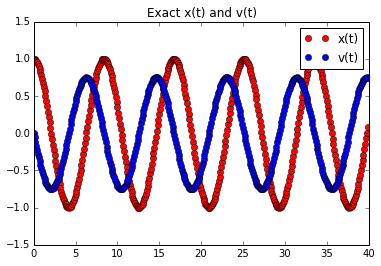

In [13]:
plt.plot(t,x,'ro',label='x(t)')
plot(t,v,'bo',label='v(t)')
legend()
plt.ylim((-1.5,1.5))
plt.title('Numerical x(t) and v(t)')
plt.figure()
plt.plot(t,xExact,'ro',label='x(t)')
plot(t,vExact,'bo',label='v(t)')
legend()
plt.ylim((-1.5,1.5))
plt.title('Exact x(t) and v(t)')

Try a few different values of delta_t. What happens as you make delta_t larger?

One subtle problem with the method we are using above is that it may not be conserving energy. You can see this happening as the amplitude grows over time. Let's try creating a quick "hack" to fix this.

Copy the position and velocity code from above. After each update, rescale the velocity so that energy is conserved.

In [4]:
# Code goes here:

## What about friction?

How could you incorporate a drag force into this program? You can assume the drag force is proportional to velocity:
$$F_\text{drag} = -b v$$

Copy your code from above and add in a drag term. Do the resulting plots make sense?

In [ ]:
# Code goes here:

In [5]:
# Plots go here: